In [1]:
import torch, torchvision

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sketches_train", {}, "data/train_annotations.coco.json", "data/train")

In [3]:
register_coco_instances("sketches_test", {}, "data/test_annotations.coco.json", "data/test")

In [4]:
train_metadata = MetadataCatalog.get("sketches_train")
train_dataset_dicts = DatasetCatalog.get("sketches_train")

test_metadata = MetadataCatalog.get("sketches_test")
test_dataset_dicts = DatasetCatalog.get("sketches_test")


[09/07 21:32:51 d2.data.datasets.coco]: Loaded 1338 images in COCO format from data/train_annotations.coco.json
[09/07 21:32:51 d2.data.datasets.coco]: Loaded 112 images in COCO format from data/test_annotations.coco.json


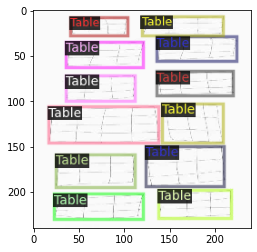

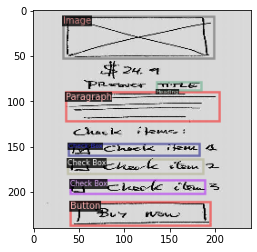

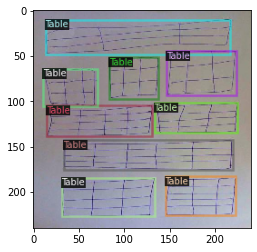

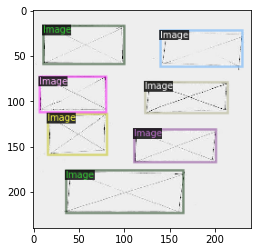

In [5]:
import random

for d in random.sample(train_dataset_dicts, 4):
    img = cv2.imread(d['file_name'], cv2.COLOR_BGR2RGB)
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.5)  # -1 converts BGR to RGB
    #print(img.shape)
    vis = visualizer.draw_dataset_dict(d)
    #print(vis.get_image())
#     cv2.imshow("image", vis.get_image()[:,:,::-1])
#     cv2.waitKey(0)
    plt.imshow(vis.get_image())
    plt.show()

In [6]:
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
import os


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("sketches_train",)
cfg.DATASETS.TEST = () 
# cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
# cfg.MODEL.DEVICE = "cpu"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 20000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14

In [7]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

[09/07 21:33:14 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[09/07 21:33:14 d2.data.datasets.coco]: Loaded 1338 images in COCO format from data/train_annotations.coco.json
[09/07 21:33:14 d2.data.build]: Removed 0 images with no usable annotations. 1338 images left.
[09/07 21:33:14 d2.data.build]: Distribution of instances among all 14 categories:
|   category   | #instances   |  category  | #instances   |  category  | #instances   |
|:------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    Button    | 2790         |  Carousel  | 1068         | Check Box  | 2952         |
|   Heading    | 1656         |   Image    | 2598         |   Label    | 1866         |
|     Link     | 2688         | Pagination | 900          | Paragraph  | 1476         |
| Radio Button | 1824         |   Select   | 2106         |   Table    | 1284         |
|   Textarea   | 906          |  Textbox   | 3288         |            |              |
|    total     | 27402        |            |              |            |              |
[09/07

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (15, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (15,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (56, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (56,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias

In [8]:
trainer.train()

[09/07 21:33:22 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\ASUS\anaconda3\envs\dt_2_new\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/07 21:33:42 d2.utils.events]:  eta: 1:48:10  iter: 19  total_loss: 5.253  loss_cls: 2.838  loss_box_reg: 0.7583  loss_rpn_cls: 1.526  loss_rpn_loc: 0.1479  time: 0.3326  data_time: 0.3054  lr: 1.9981e-05  max_mem: 1827M
[09/07 21:33:49 d2.utils.events]:  eta: 1:49:19  iter: 39  total_loss: 3.355  loss_cls: 2.41  loss_box_reg: 0.782  loss_rpn_cls: 0.04627  loss_rpn_loc: 0.09452  time: 0.3331  data_time: 0.0010  lr: 3.9961e-05  max_mem: 1827M
[09/07 21:33:55 d2.utils.events]:  eta: 1:49:06  iter: 59  total_loss: 2.752  loss_cls: 1.71  loss_box_reg: 0.8349  loss_rpn_cls: 0.06266  loss_rpn_loc: 0.0817  time: 0.3303  data_time: 0.0011  lr: 5.9941e-05  max_mem: 1827M
[09/07 21:34:02 d2.utils.events]:  eta: 1:48:54  iter: 79  total_loss: 2.238  loss_cls: 1.16  loss_box_reg: 0.8865  loss_rpn_cls: 0.05871  loss_rpn_loc: 0.1075  time: 0.3273  data_time: 0.0012  lr: 7.9921e-05  max_mem: 1827M
[09/07 21:34:08 d2.utils.events]:  eta: 1:48:47  iter: 99  total_loss: 2.118  loss_cls: 1.097  loss_b

[09/07 21:37:33 d2.utils.events]:  eta: 1:46:27  iter: 719  total_loss: 0.766  loss_cls: 0.295  loss_box_reg: 0.3739  loss_rpn_cls: 0.01341  loss_rpn_loc: 0.07583  time: 0.3294  data_time: 0.0011  lr: 0.00071928  max_mem: 1827M
[09/07 21:37:40 d2.utils.events]:  eta: 1:46:23  iter: 739  total_loss: 0.8558  loss_cls: 0.3758  loss_box_reg: 0.3575  loss_rpn_cls: 0.01553  loss_rpn_loc: 0.08143  time: 0.3297  data_time: 0.0011  lr: 0.00073926  max_mem: 1827M
[09/07 21:37:46 d2.utils.events]:  eta: 1:46:13  iter: 759  total_loss: 0.8126  loss_cls: 0.3385  loss_box_reg: 0.3823  loss_rpn_cls: 0.01446  loss_rpn_loc: 0.08071  time: 0.3293  data_time: 0.0011  lr: 0.00075924  max_mem: 1827M
[09/07 21:37:52 d2.utils.events]:  eta: 1:46:05  iter: 779  total_loss: 0.677  loss_cls: 0.208  loss_box_reg: 0.3004  loss_rpn_cls: 0.00992  loss_rpn_loc: 0.05932  time: 0.3289  data_time: 0.0010  lr: 0.00077922  max_mem: 1827M
[09/07 21:37:59 d2.utils.events]:  eta: 1:45:54  iter: 799  total_loss: 0.7478  loss

[09/07 21:41:23 d2.utils.events]:  eta: 1:42:48  iter: 1419  total_loss: 0.5955  loss_cls: 0.215  loss_box_reg: 0.2794  loss_rpn_cls: 0.01436  loss_rpn_loc: 0.08521  time: 0.3289  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 21:41:30 d2.utils.events]:  eta: 1:42:45  iter: 1439  total_loss: 0.44  loss_cls: 0.178  loss_box_reg: 0.2046  loss_rpn_cls: 0.006307  loss_rpn_loc: 0.0643  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:41:37 d2.utils.events]:  eta: 1:42:38  iter: 1459  total_loss: 0.5659  loss_cls: 0.1934  loss_box_reg: 0.3142  loss_rpn_cls: 0.008781  loss_rpn_loc: 0.05745  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:41:43 d2.utils.events]:  eta: 1:42:31  iter: 1479  total_loss: 0.5201  loss_cls: 0.2102  loss_box_reg: 0.2404  loss_rpn_cls: 0.0086  loss_rpn_loc: 0.06912  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:41:50 d2.utils.events]:  eta: 1:42:22  iter: 1499  total_loss: 0.4309  loss_cls: 0.1333  l

[09/07 21:45:14 d2.utils.events]:  eta: 1:39:13  iter: 2119  total_loss: 0.4743  loss_cls: 0.1614  loss_box_reg: 0.2272  loss_rpn_cls: 0.00753  loss_rpn_loc: 0.06237  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:45:20 d2.utils.events]:  eta: 1:39:04  iter: 2139  total_loss: 0.4372  loss_cls: 0.1281  loss_box_reg: 0.2543  loss_rpn_cls: 0.007326  loss_rpn_loc: 0.05099  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:45:27 d2.utils.events]:  eta: 1:38:59  iter: 2159  total_loss: 0.4585  loss_cls: 0.1572  loss_box_reg: 0.2202  loss_rpn_cls: 0.01163  loss_rpn_loc: 0.07373  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:45:34 d2.utils.events]:  eta: 1:38:53  iter: 2179  total_loss: 0.5803  loss_cls: 0.1597  loss_box_reg: 0.2523  loss_rpn_cls: 0.005421  loss_rpn_loc: 0.08976  time: 0.3289  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:45:40 d2.utils.events]:  eta: 1:38:48  iter: 2199  total_loss: 0.4364  loss_cls: 0.1

[09/07 21:49:04 d2.utils.events]:  eta: 1:35:13  iter: 2819  total_loss: 0.4391  loss_cls: 0.137  loss_box_reg: 0.2101  loss_rpn_cls: 0.006774  loss_rpn_loc: 0.06239  time: 0.3289  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:49:11 d2.utils.events]:  eta: 1:35:06  iter: 2839  total_loss: 0.3889  loss_cls: 0.1342  loss_box_reg: 0.188  loss_rpn_cls: 0.004242  loss_rpn_loc: 0.04373  time: 0.3289  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:49:18 d2.utils.events]:  eta: 1:35:00  iter: 2859  total_loss: 0.422  loss_cls: 0.1706  loss_box_reg: 0.1967  loss_rpn_cls: 0.004303  loss_rpn_loc: 0.06431  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:49:24 d2.utils.events]:  eta: 1:34:55  iter: 2879  total_loss: 0.403  loss_cls: 0.1114  loss_box_reg: 0.2087  loss_rpn_cls: 0.004119  loss_rpn_loc: 0.06403  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:49:31 d2.utils.events]:  eta: 1:34:47  iter: 2899  total_loss: 0.4439  loss_cls: 0.131

[09/07 21:52:55 d2.utils.events]:  eta: 1:31:30  iter: 3519  total_loss: 0.3587  loss_cls: 0.1074  loss_box_reg: 0.2234  loss_rpn_cls: 0.004065  loss_rpn_loc: 0.05099  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:53:02 d2.utils.events]:  eta: 1:31:22  iter: 3539  total_loss: 0.4111  loss_cls: 0.1238  loss_box_reg: 0.2082  loss_rpn_cls: 0.006239  loss_rpn_loc: 0.07111  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:53:08 d2.utils.events]:  eta: 1:31:13  iter: 3559  total_loss: 0.3201  loss_cls: 0.1067  loss_box_reg: 0.1906  loss_rpn_cls: 0.003649  loss_rpn_loc: 0.03564  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:53:14 d2.utils.events]:  eta: 1:31:03  iter: 3579  total_loss: 0.3737  loss_cls: 0.07057  loss_box_reg: 0.2137  loss_rpn_cls: 0.005814  loss_rpn_loc: 0.04378  time: 0.3289  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:53:21 d2.utils.events]:  eta: 1:30:54  iter: 3599  total_loss: 0.3823  loss_cls: 

[09/07 21:56:46 d2.utils.events]:  eta: 1:27:30  iter: 4219  total_loss: 0.3441  loss_cls: 0.1031  loss_box_reg: 0.1869  loss_rpn_cls: 0.007845  loss_rpn_loc: 0.05037  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:56:52 d2.utils.events]:  eta: 1:27:21  iter: 4239  total_loss: 0.3739  loss_cls: 0.1315  loss_box_reg: 0.19  loss_rpn_cls: 0.005252  loss_rpn_loc: 0.03798  time: 0.3290  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 21:56:59 d2.utils.events]:  eta: 1:27:14  iter: 4259  total_loss: 0.3887  loss_cls: 0.1195  loss_box_reg: 0.217  loss_rpn_cls: 0.003107  loss_rpn_loc: 0.05741  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 21:57:05 d2.utils.events]:  eta: 1:27:08  iter: 4279  total_loss: 0.3579  loss_cls: 0.1074  loss_box_reg: 0.1686  loss_rpn_cls: 0.004393  loss_rpn_loc: 0.05708  time: 0.3290  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 21:57:12 d2.utils.events]:  eta: 1:27:01  iter: 4299  total_loss: 0.3361  loss_cls: 0.10

[09/07 22:00:37 d2.utils.events]:  eta: 1:23:42  iter: 4919  total_loss: 0.3181  loss_cls: 0.09171  loss_box_reg: 0.199  loss_rpn_cls: 0.005971  loss_rpn_loc: 0.0458  time: 0.3292  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:00:44 d2.utils.events]:  eta: 1:23:37  iter: 4939  total_loss: 0.4447  loss_cls: 0.1091  loss_box_reg: 0.2226  loss_rpn_cls: 0.01264  loss_rpn_loc: 0.07703  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:00:50 d2.utils.events]:  eta: 1:23:32  iter: 4959  total_loss: 0.3221  loss_cls: 0.09686  loss_box_reg: 0.1753  loss_rpn_cls: 0.003381  loss_rpn_loc: 0.05044  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:00:57 d2.utils.events]:  eta: 1:23:23  iter: 4979  total_loss: 0.3332  loss_cls: 0.08807  loss_box_reg: 0.1954  loss_rpn_cls: 0.003247  loss_rpn_loc: 0.03825  time: 0.3292  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:01:04 d2.utils.events]:  eta: 1:23:19  iter: 4999  total_loss: 0.3221  loss_cls: 0

[09/07 22:04:28 d2.utils.events]:  eta: 1:19:47  iter: 5619  total_loss: 0.3787  loss_cls: 0.0955  loss_box_reg: 0.1951  loss_rpn_cls: 0.003248  loss_rpn_loc: 0.05948  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:04:35 d2.utils.events]:  eta: 1:19:39  iter: 5639  total_loss: 0.2987  loss_cls: 0.09185  loss_box_reg: 0.1567  loss_rpn_cls: 0.003488  loss_rpn_loc: 0.03768  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:04:41 d2.utils.events]:  eta: 1:19:29  iter: 5659  total_loss: 0.3186  loss_cls: 0.07884  loss_box_reg: 0.1691  loss_rpn_cls: 0.004209  loss_rpn_loc: 0.04499  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:04:47 d2.utils.events]:  eta: 1:19:22  iter: 5679  total_loss: 0.3504  loss_cls: 0.09334  loss_box_reg: 0.1803  loss_rpn_cls: 0.003491  loss_rpn_loc: 0.0587  time: 0.3291  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:04:54 d2.utils.events]:  eta: 1:19:15  iter: 5699  total_loss: 0.2811  loss_cls:

[09/07 22:08:18 d2.utils.events]:  eta: 1:15:46  iter: 6319  total_loss: 0.4116  loss_cls: 0.1156  loss_box_reg: 0.1626  loss_rpn_cls: 0.003473  loss_rpn_loc: 0.0286  time: 0.3291  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:08:25 d2.utils.events]:  eta: 1:15:40  iter: 6339  total_loss: 0.2624  loss_cls: 0.0702  loss_box_reg: 0.1634  loss_rpn_cls: 0.003281  loss_rpn_loc: 0.05089  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:08:31 d2.utils.events]:  eta: 1:15:35  iter: 6359  total_loss: 0.3187  loss_cls: 0.08336  loss_box_reg: 0.1759  loss_rpn_cls: 0.003638  loss_rpn_loc: 0.04587  time: 0.3291  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:08:38 d2.utils.events]:  eta: 1:15:29  iter: 6379  total_loss: 0.3097  loss_cls: 0.09853  loss_box_reg: 0.1732  loss_rpn_cls: 0.004045  loss_rpn_loc: 0.04739  time: 0.3291  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:08:45 d2.utils.events]:  eta: 1:15:23  iter: 6399  total_loss: 0.3317  loss_cls: 

[09/07 22:12:08 d2.utils.events]:  eta: 1:11:54  iter: 7019  total_loss: 0.2819  loss_cls: 0.07081  loss_box_reg: 0.155  loss_rpn_cls: 0.00277  loss_rpn_loc: 0.04843  time: 0.3290  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:12:15 d2.utils.events]:  eta: 1:11:49  iter: 7039  total_loss: 0.3562  loss_cls: 0.1038  loss_box_reg: 0.1697  loss_rpn_cls: 0.002117  loss_rpn_loc: 0.04804  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:12:21 d2.utils.events]:  eta: 1:11:43  iter: 7059  total_loss: 0.3229  loss_cls: 0.08389  loss_box_reg: 0.1746  loss_rpn_cls: 0.002303  loss_rpn_loc: 0.04472  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:12:28 d2.utils.events]:  eta: 1:11:35  iter: 7079  total_loss: 0.3041  loss_cls: 0.06766  loss_box_reg: 0.1738  loss_rpn_cls: 0.002983  loss_rpn_loc: 0.05212  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:12:35 d2.utils.events]:  eta: 1:11:28  iter: 7099  total_loss: 0.3124  loss_cls: 

[09/07 22:15:59 d2.utils.events]:  eta: 1:08:06  iter: 7719  total_loss: 0.2957  loss_cls: 0.07047  loss_box_reg: 0.1658  loss_rpn_cls: 0.003938  loss_rpn_loc: 0.05484  time: 0.3290  data_time: 0.0012  lr: 0.001  max_mem: 1827M
[09/07 22:16:06 d2.utils.events]:  eta: 1:07:59  iter: 7739  total_loss: 0.2703  loss_cls: 0.06218  loss_box_reg: 0.1607  loss_rpn_cls: 0.003334  loss_rpn_loc: 0.0518  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:16:12 d2.utils.events]:  eta: 1:07:52  iter: 7759  total_loss: 0.3152  loss_cls: 0.07591  loss_box_reg: 0.1704  loss_rpn_cls: 0.00394  loss_rpn_loc: 0.05351  time: 0.3290  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:16:19 d2.utils.events]:  eta: 1:07:46  iter: 7779  total_loss: 0.3246  loss_cls: 0.08924  loss_box_reg: 0.1861  loss_rpn_cls: 0.003477  loss_rpn_loc: 0.04408  time: 0.3290  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:16:25 d2.utils.events]:  eta: 1:07:37  iter: 7799  total_loss: 0.357  loss_cls: 

[09/07 22:19:51 d2.utils.events]:  eta: 1:04:22  iter: 8419  total_loss: 0.3498  loss_cls: 0.1071  loss_box_reg: 0.1793  loss_rpn_cls: 0.005054  loss_rpn_loc: 0.055  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:19:58 d2.utils.events]:  eta: 1:04:16  iter: 8439  total_loss: 0.2872  loss_cls: 0.07396  loss_box_reg: 0.1536  loss_rpn_cls: 0.002259  loss_rpn_loc: 0.0404  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:20:04 d2.utils.events]:  eta: 1:04:11  iter: 8459  total_loss: 0.3181  loss_cls: 0.1008  loss_box_reg: 0.164  loss_rpn_cls: 0.00324  loss_rpn_loc: 0.04771  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:20:11 d2.utils.events]:  eta: 1:04:02  iter: 8479  total_loss: 0.3125  loss_cls: 0.08745  loss_box_reg: 0.1683  loss_rpn_cls: 0.00255  loss_rpn_loc: 0.03522  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:20:17 d2.utils.events]:  eta: 1:03:57  iter: 8499  total_loss: 0.3128  loss_cls: 0.085

[09/07 22:23:43 d2.utils.events]:  eta: 1:00:25  iter: 9119  total_loss: 0.3475  loss_cls: 0.1009  loss_box_reg: 0.1658  loss_rpn_cls: 0.004542  loss_rpn_loc: 0.05998  time: 0.3293  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:23:50 d2.utils.events]:  eta: 1:00:21  iter: 9139  total_loss: 0.2618  loss_cls: 0.07122  loss_box_reg: 0.1567  loss_rpn_cls: 0.002529  loss_rpn_loc: 0.03164  time: 0.3293  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:23:56 d2.utils.events]:  eta: 1:00:15  iter: 9159  total_loss: 0.2535  loss_cls: 0.07329  loss_box_reg: 0.14  loss_rpn_cls: 0.003114  loss_rpn_loc: 0.04561  time: 0.3293  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:24:03 d2.utils.events]:  eta: 1:00:09  iter: 9179  total_loss: 0.2773  loss_cls: 0.07383  loss_box_reg: 0.1513  loss_rpn_cls: 0.002381  loss_rpn_loc: 0.05235  time: 0.3293  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:24:10 d2.utils.events]:  eta: 1:00:02  iter: 9199  total_loss: 0.285  loss_cls: 0

[09/07 22:27:34 d2.utils.events]:  eta: 0:56:27  iter: 9819  total_loss: 0.272  loss_cls: 0.06633  loss_box_reg: 0.1485  loss_rpn_cls: 0.003084  loss_rpn_loc: 0.03845  time: 0.3293  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:27:40 d2.utils.events]:  eta: 0:56:20  iter: 9839  total_loss: 0.301  loss_cls: 0.067  loss_box_reg: 0.1638  loss_rpn_cls: 0.005667  loss_rpn_loc: 0.05087  time: 0.3293  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:27:46 d2.utils.events]:  eta: 0:56:13  iter: 9859  total_loss: 0.3078  loss_cls: 0.08677  loss_box_reg: 0.1597  loss_rpn_cls: 0.001986  loss_rpn_loc: 0.03577  time: 0.3293  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:27:53 d2.utils.events]:  eta: 0:56:07  iter: 9879  total_loss: 0.2613  loss_cls: 0.05846  loss_box_reg: 0.1429  loss_rpn_cls: 0.001568  loss_rpn_loc: 0.03211  time: 0.3293  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:28:00 d2.utils.events]:  eta: 0:55:57  iter: 9899  total_loss: 0.2741  loss_cls: 0

[09/07 22:31:24 d2.utils.events]:  eta: 0:52:21  iter: 10519  total_loss: 0.2586  loss_cls: 0.06743  loss_box_reg: 0.1573  loss_rpn_cls: 0.001986  loss_rpn_loc: 0.03655  time: 0.3292  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:31:30 d2.utils.events]:  eta: 0:52:13  iter: 10539  total_loss: 0.255  loss_cls: 0.05108  loss_box_reg: 0.1428  loss_rpn_cls: 0.002784  loss_rpn_loc: 0.03251  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:31:37 d2.utils.events]:  eta: 0:52:08  iter: 10559  total_loss: 0.3485  loss_cls: 0.09178  loss_box_reg: 0.1768  loss_rpn_cls: 0.002334  loss_rpn_loc: 0.05035  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:31:44 d2.utils.events]:  eta: 0:52:01  iter: 10579  total_loss: 0.2738  loss_cls: 0.0557  loss_box_reg: 0.1574  loss_rpn_cls: 0.002178  loss_rpn_loc: 0.03985  time: 0.3292  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:31:51 d2.utils.events]:  eta: 0:51:58  iter: 10599  total_loss: 0.3532  loss

[09/07 22:35:17 d2.utils.events]:  eta: 0:48:54  iter: 11219  total_loss: 0.2263  loss_cls: 0.0462  loss_box_reg: 0.1358  loss_rpn_cls: 0.001668  loss_rpn_loc: 0.04131  time: 0.3295  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:35:24 d2.utils.events]:  eta: 0:48:47  iter: 11239  total_loss: 0.3105  loss_cls: 0.07964  loss_box_reg: 0.1555  loss_rpn_cls: 0.003317  loss_rpn_loc: 0.05668  time: 0.3295  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:35:31 d2.utils.events]:  eta: 0:48:41  iter: 11259  total_loss: 0.2551  loss_cls: 0.05883  loss_box_reg: 0.1462  loss_rpn_cls: 0.002642  loss_rpn_loc: 0.04145  time: 0.3295  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:35:37 d2.utils.events]:  eta: 0:48:35  iter: 11279  total_loss: 0.2888  loss_cls: 0.07359  loss_box_reg: 0.1541  loss_rpn_cls: 0.004039  loss_rpn_loc: 0.04714  time: 0.3295  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:35:44 d2.utils.events]:  eta: 0:48:30  iter: 11299  total_loss: 0.2681  los

[09/07 22:39:11 d2.utils.events]:  eta: 0:45:09  iter: 11919  total_loss: 0.261  loss_cls: 0.05897  loss_box_reg: 0.1621  loss_rpn_cls: 0.002417  loss_rpn_loc: 0.03607  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:39:18 d2.utils.events]:  eta: 0:45:03  iter: 11939  total_loss: 0.285  loss_cls: 0.04814  loss_box_reg: 0.1442  loss_rpn_cls: 0.002431  loss_rpn_loc: 0.04717  time: 0.3297  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:39:24 d2.utils.events]:  eta: 0:44:56  iter: 11959  total_loss: 0.3019  loss_cls: 0.08904  loss_box_reg: 0.1559  loss_rpn_cls: 0.002629  loss_rpn_loc: 0.04877  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:39:31 d2.utils.events]:  eta: 0:44:49  iter: 11979  total_loss: 0.2731  loss_cls: 0.06185  loss_box_reg: 0.1505  loss_rpn_cls: 0.00523  loss_rpn_loc: 0.04907  time: 0.3297  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:39:38 d2.utils.events]:  eta: 0:44:42  iter: 11999  total_loss: 0.2695  loss_

[09/07 22:43:02 d2.utils.events]:  eta: 0:41:00  iter: 12619  total_loss: 0.308  loss_cls: 0.07042  loss_box_reg: 0.1506  loss_rpn_cls: 0.002378  loss_rpn_loc: 0.04703  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:43:09 d2.utils.events]:  eta: 0:40:53  iter: 12639  total_loss: 0.282  loss_cls: 0.06911  loss_box_reg: 0.1381  loss_rpn_cls: 0.002367  loss_rpn_loc: 0.04385  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:43:16 d2.utils.events]:  eta: 0:40:47  iter: 12659  total_loss: 0.3053  loss_cls: 0.06862  loss_box_reg: 0.1511  loss_rpn_cls: 0.002304  loss_rpn_loc: 0.05347  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:43:22 d2.utils.events]:  eta: 0:40:39  iter: 12679  total_loss: 0.2721  loss_cls: 0.04852  loss_box_reg: 0.141  loss_rpn_cls: 0.002396  loss_rpn_loc: 0.05813  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:43:29 d2.utils.events]:  eta: 0:40:32  iter: 12699  total_loss: 0.3189  loss_

[09/07 22:46:53 d2.utils.events]:  eta: 0:37:02  iter: 13319  total_loss: 0.2566  loss_cls: 0.05989  loss_box_reg: 0.1552  loss_rpn_cls: 0.002614  loss_rpn_loc: 0.03581  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:47:00 d2.utils.events]:  eta: 0:36:57  iter: 13339  total_loss: 0.3056  loss_cls: 0.07849  loss_box_reg: 0.149  loss_rpn_cls: 0.003366  loss_rpn_loc: 0.05227  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:47:06 d2.utils.events]:  eta: 0:36:50  iter: 13359  total_loss: 0.282  loss_cls: 0.07649  loss_box_reg: 0.1454  loss_rpn_cls: 0.006704  loss_rpn_loc: 0.05502  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:47:13 d2.utils.events]:  eta: 0:36:43  iter: 13379  total_loss: 0.2345  loss_cls: 0.06179  loss_box_reg: 0.1315  loss_rpn_cls: 0.002014  loss_rpn_loc: 0.04352  time: 0.3297  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:47:20 d2.utils.events]:  eta: 0:36:37  iter: 13399  total_loss: 0.2551  loss

[09/07 22:50:45 d2.utils.events]:  eta: 0:33:06  iter: 14019  total_loss: 0.2481  loss_cls: 0.08029  loss_box_reg: 0.1285  loss_rpn_cls: 0.001516  loss_rpn_loc: 0.03264  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:50:51 d2.utils.events]:  eta: 0:32:59  iter: 14039  total_loss: 0.2645  loss_cls: 0.06415  loss_box_reg: 0.1468  loss_rpn_cls: 0.001502  loss_rpn_loc: 0.03181  time: 0.3297  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:50:58 d2.utils.events]:  eta: 0:32:54  iter: 14059  total_loss: 0.3072  loss_cls: 0.08746  loss_box_reg: 0.1615  loss_rpn_cls: 0.002196  loss_rpn_loc: 0.0414  time: 0.3297  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:51:04 d2.utils.events]:  eta: 0:32:47  iter: 14079  total_loss: 0.2671  loss_cls: 0.06924  loss_box_reg: 0.15  loss_rpn_cls: 0.001985  loss_rpn_loc: 0.03536  time: 0.3297  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:51:11 d2.utils.events]:  eta: 0:32:42  iter: 14099  total_loss: 0.2486  loss_

[09/07 22:54:38 d2.utils.events]:  eta: 0:29:18  iter: 14719  total_loss: 0.2768  loss_cls: 0.06351  loss_box_reg: 0.1562  loss_rpn_cls: 0.002181  loss_rpn_loc: 0.04057  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:54:45 d2.utils.events]:  eta: 0:29:11  iter: 14739  total_loss: 0.2857  loss_cls: 0.07507  loss_box_reg: 0.1699  loss_rpn_cls: 0.001905  loss_rpn_loc: 0.04281  time: 0.3299  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:54:51 d2.utils.events]:  eta: 0:29:04  iter: 14759  total_loss: 0.2795  loss_cls: 0.05973  loss_box_reg: 0.1444  loss_rpn_cls: 0.002666  loss_rpn_loc: 0.04188  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:54:58 d2.utils.events]:  eta: 0:28:57  iter: 14779  total_loss: 0.2067  loss_cls: 0.05513  loss_box_reg: 0.1163  loss_rpn_cls: 0.001584  loss_rpn_loc: 0.02783  time: 0.3299  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 22:55:04 d2.utils.events]:  eta: 0:28:51  iter: 14799  total_loss: 0.2691  lo

[09/07 22:58:30 d2.utils.events]:  eta: 0:25:25  iter: 15419  total_loss: 0.2975  loss_cls: 0.07815  loss_box_reg: 0.1435  loss_rpn_cls: 0.003991  loss_rpn_loc: 0.04681  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:58:36 d2.utils.events]:  eta: 0:25:20  iter: 15439  total_loss: 0.2253  loss_cls: 0.05693  loss_box_reg: 0.1379  loss_rpn_cls: 0.001774  loss_rpn_loc: 0.03974  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:58:43 d2.utils.events]:  eta: 0:25:13  iter: 15459  total_loss: 0.2515  loss_cls: 0.04594  loss_box_reg: 0.1272  loss_rpn_cls: 0.002443  loss_rpn_loc: 0.03666  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:58:49 d2.utils.events]:  eta: 0:25:06  iter: 15479  total_loss: 0.2654  loss_cls: 0.0715  loss_box_reg: 0.1481  loss_rpn_cls: 0.002494  loss_rpn_loc: 0.03704  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 22:58:56 d2.utils.events]:  eta: 0:24:59  iter: 15499  total_loss: 0.268  loss

[09/07 23:02:21 d2.utils.events]:  eta: 0:21:33  iter: 16119  total_loss: 0.2246  loss_cls: 0.05289  loss_box_reg: 0.1262  loss_rpn_cls: 0.001353  loss_rpn_loc: 0.02782  time: 0.3299  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:02:28 d2.utils.events]:  eta: 0:21:25  iter: 16139  total_loss: 0.2742  loss_cls: 0.08365  loss_box_reg: 0.1301  loss_rpn_cls: 0.004861  loss_rpn_loc: 0.03342  time: 0.3299  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:02:34 d2.utils.events]:  eta: 0:21:18  iter: 16159  total_loss: 0.2426  loss_cls: 0.058  loss_box_reg: 0.1358  loss_rpn_cls: 0.002282  loss_rpn_loc: 0.03373  time: 0.3299  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:02:41 d2.utils.events]:  eta: 0:21:12  iter: 16179  total_loss: 0.2874  loss_cls: 0.0753  loss_box_reg: 0.1564  loss_rpn_cls: 0.003904  loss_rpn_loc: 0.04959  time: 0.3299  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:02:48 d2.utils.events]:  eta: 0:21:06  iter: 16199  total_loss: 0.2285  loss_

[09/07 23:06:14 d2.utils.events]:  eta: 0:17:41  iter: 16819  total_loss: 0.2664  loss_cls: 0.06539  loss_box_reg: 0.147  loss_rpn_cls: 0.001996  loss_rpn_loc: 0.04302  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:06:21 d2.utils.events]:  eta: 0:17:34  iter: 16839  total_loss: 0.2089  loss_cls: 0.06944  loss_box_reg: 0.1179  loss_rpn_cls: 0.001224  loss_rpn_loc: 0.03272  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:06:27 d2.utils.events]:  eta: 0:17:27  iter: 16859  total_loss: 0.219  loss_cls: 0.04668  loss_box_reg: 0.1276  loss_rpn_cls: 0.002556  loss_rpn_loc: 0.03436  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:06:34 d2.utils.events]:  eta: 0:17:21  iter: 16879  total_loss: 0.2672  loss_cls: 0.05762  loss_box_reg: 0.1472  loss_rpn_cls: 0.001714  loss_rpn_loc: 0.04566  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:06:41 d2.utils.events]:  eta: 0:17:15  iter: 16899  total_loss: 0.2527  loss

[09/07 23:10:06 d2.utils.events]:  eta: 0:13:49  iter: 17519  total_loss: 0.1821  loss_cls: 0.04658  loss_box_reg: 0.1084  loss_rpn_cls: 0.00199  loss_rpn_loc: 0.0372  time: 0.3301  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:10:13 d2.utils.events]:  eta: 0:13:43  iter: 17539  total_loss: 0.2494  loss_cls: 0.05256  loss_box_reg: 0.1351  loss_rpn_cls: 0.001499  loss_rpn_loc: 0.03745  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:10:19 d2.utils.events]:  eta: 0:13:36  iter: 17559  total_loss: 0.2104  loss_cls: 0.04539  loss_box_reg: 0.1316  loss_rpn_cls: 0.002449  loss_rpn_loc: 0.03569  time: 0.3301  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:10:26 d2.utils.events]:  eta: 0:13:29  iter: 17579  total_loss: 0.2441  loss_cls: 0.06836  loss_box_reg: 0.145  loss_rpn_cls: 0.002484  loss_rpn_loc: 0.04558  time: 0.3301  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:10:32 d2.utils.events]:  eta: 0:13:22  iter: 17599  total_loss: 0.2102  loss_

[09/07 23:13:58 d2.utils.events]:  eta: 0:09:54  iter: 18219  total_loss: 0.2522  loss_cls: 0.08869  loss_box_reg: 0.1194  loss_rpn_cls: 0.001784  loss_rpn_loc: 0.03731  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:14:05 d2.utils.events]:  eta: 0:09:47  iter: 18239  total_loss: 0.2966  loss_cls: 0.05321  loss_box_reg: 0.148  loss_rpn_cls: 0.002241  loss_rpn_loc: 0.04545  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:14:11 d2.utils.events]:  eta: 0:09:41  iter: 18259  total_loss: 0.2188  loss_cls: 0.0364  loss_box_reg: 0.1187  loss_rpn_cls: 0.002935  loss_rpn_loc: 0.0454  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:14:18 d2.utils.events]:  eta: 0:09:34  iter: 18279  total_loss: 0.2097  loss_cls: 0.04167  loss_box_reg: 0.138  loss_rpn_cls: 0.001749  loss_rpn_loc: 0.0339  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:14:24 d2.utils.events]:  eta: 0:09:27  iter: 18299  total_loss: 0.2378  loss_cl

[09/07 23:17:48 d2.utils.events]:  eta: 0:05:59  iter: 18919  total_loss: 0.3085  loss_cls: 0.06436  loss_box_reg: 0.1649  loss_rpn_cls: 0.002706  loss_rpn_loc: 0.04429  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:17:55 d2.utils.events]:  eta: 0:05:53  iter: 18939  total_loss: 0.2608  loss_cls: 0.05031  loss_box_reg: 0.1458  loss_rpn_cls: 0.002045  loss_rpn_loc: 0.04818  time: 0.3301  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:18:02 d2.utils.events]:  eta: 0:05:46  iter: 18959  total_loss: 0.2397  loss_cls: 0.05766  loss_box_reg: 0.133  loss_rpn_cls: 0.001898  loss_rpn_loc: 0.04225  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:18:08 d2.utils.events]:  eta: 0:05:39  iter: 18979  total_loss: 0.2329  loss_cls: 0.03578  loss_box_reg: 0.141  loss_rpn_cls: 0.003522  loss_rpn_loc: 0.04117  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:18:15 d2.utils.events]:  eta: 0:05:33  iter: 18999  total_loss: 0.2742  loss

[09/07 23:21:38 d2.utils.events]:  eta: 0:02:06  iter: 19619  total_loss: 0.2403  loss_cls: 0.08818  loss_box_reg: 0.1172  loss_rpn_cls: 0.002325  loss_rpn_loc: 0.03501  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:21:45 d2.utils.events]:  eta: 0:01:59  iter: 19639  total_loss: 0.2545  loss_cls: 0.07529  loss_box_reg: 0.1372  loss_rpn_cls: 0.001874  loss_rpn_loc: 0.04605  time: 0.3300  data_time: 0.0010  lr: 0.001  max_mem: 1827M
[09/07 23:21:51 d2.utils.events]:  eta: 0:01:53  iter: 19659  total_loss: 0.2534  loss_cls: 0.0697  loss_box_reg: 0.1488  loss_rpn_cls: 0.001552  loss_rpn_loc: 0.04553  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:21:58 d2.utils.events]:  eta: 0:01:46  iter: 19679  total_loss: 0.2233  loss_cls: 0.05065  loss_box_reg: 0.147  loss_rpn_cls: 0.001633  loss_rpn_loc: 0.03143  time: 0.3300  data_time: 0.0011  lr: 0.001  max_mem: 1827M
[09/07 23:22:04 d2.utils.events]:  eta: 0:01:39  iter: 19699  total_loss: 0.2475  loss

In [9]:
current_device = torch.cuda.current_device()
torch.cuda.get_device_name(current_device)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [11]:
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

In [9]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[09/07 23:24:29 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

[09/07 23:24:49 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,1,1)             |
| backbone.bottom_up.res2.0.conv2.*               | backbone.bottom_up.res2.0.conv2.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    | (64,) (64,) (64,) (64,) (64,64,3,3)             |
| backbone.bottom_up.res2.0.conv3.*               | backbone.bottom_up.res2.0.conv3.{norm.bia

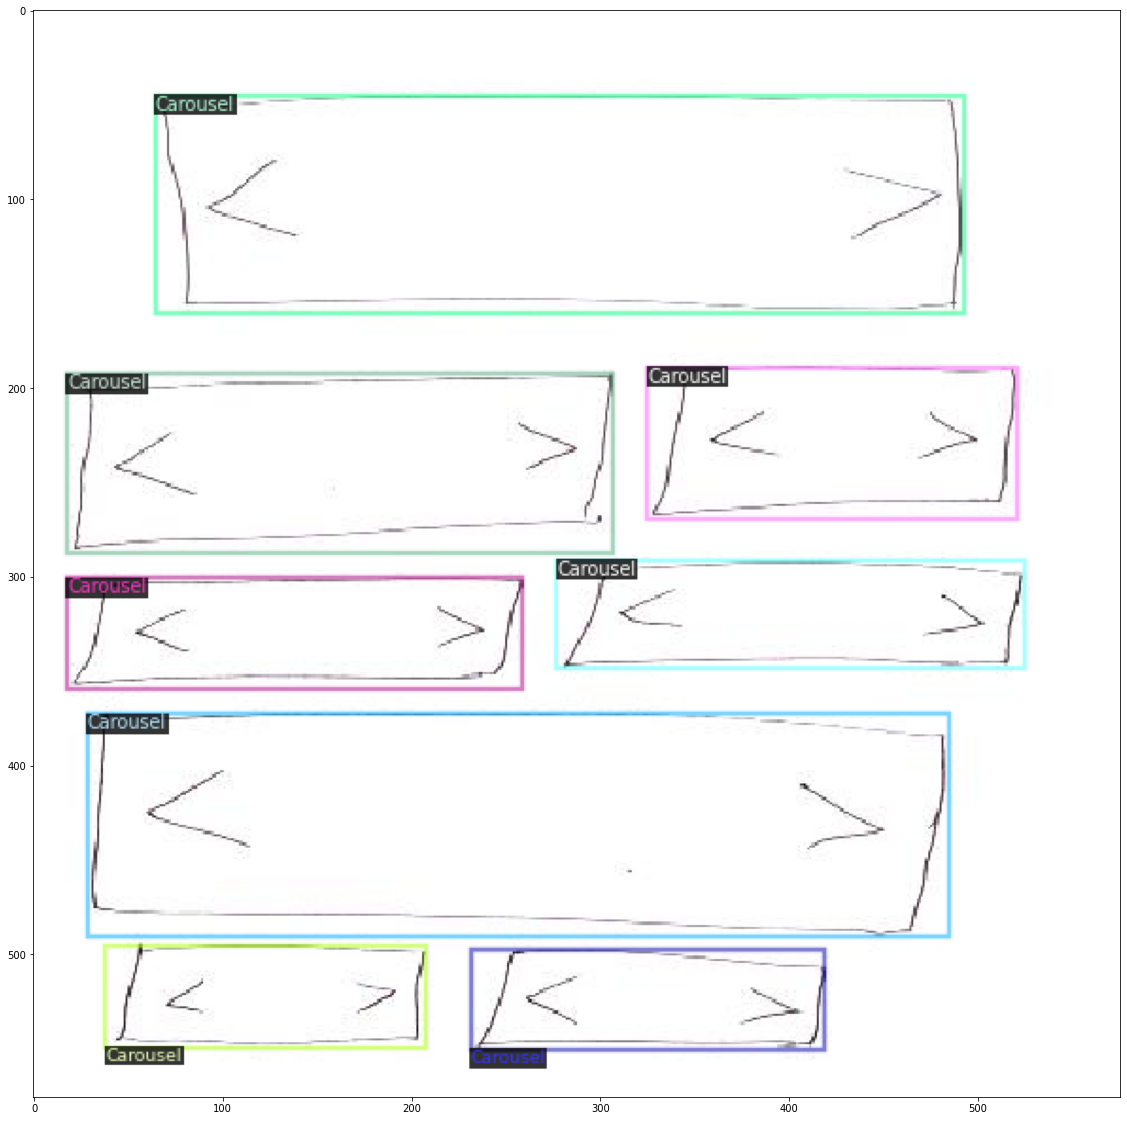

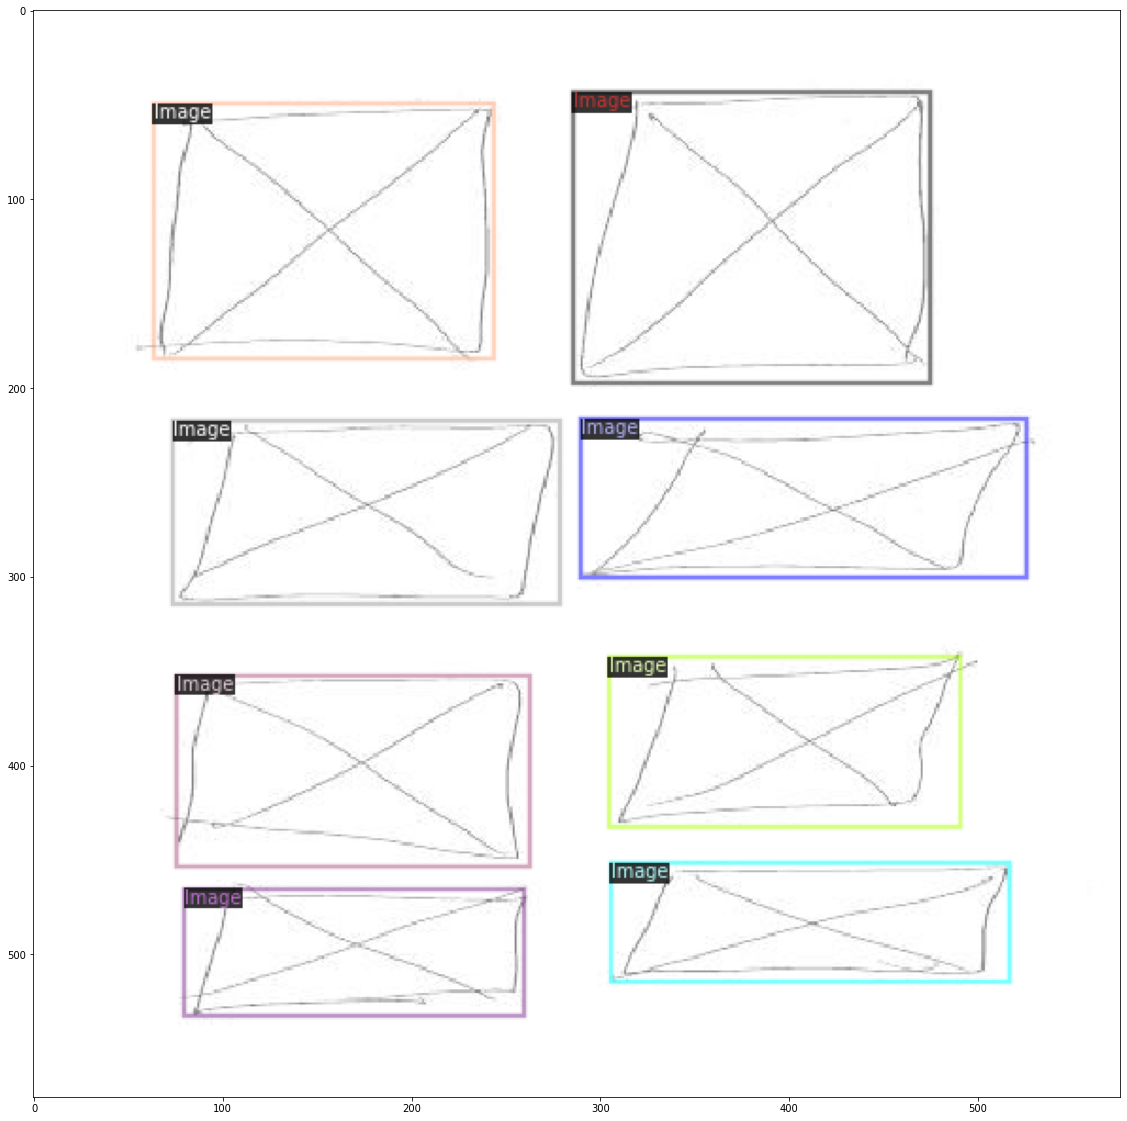

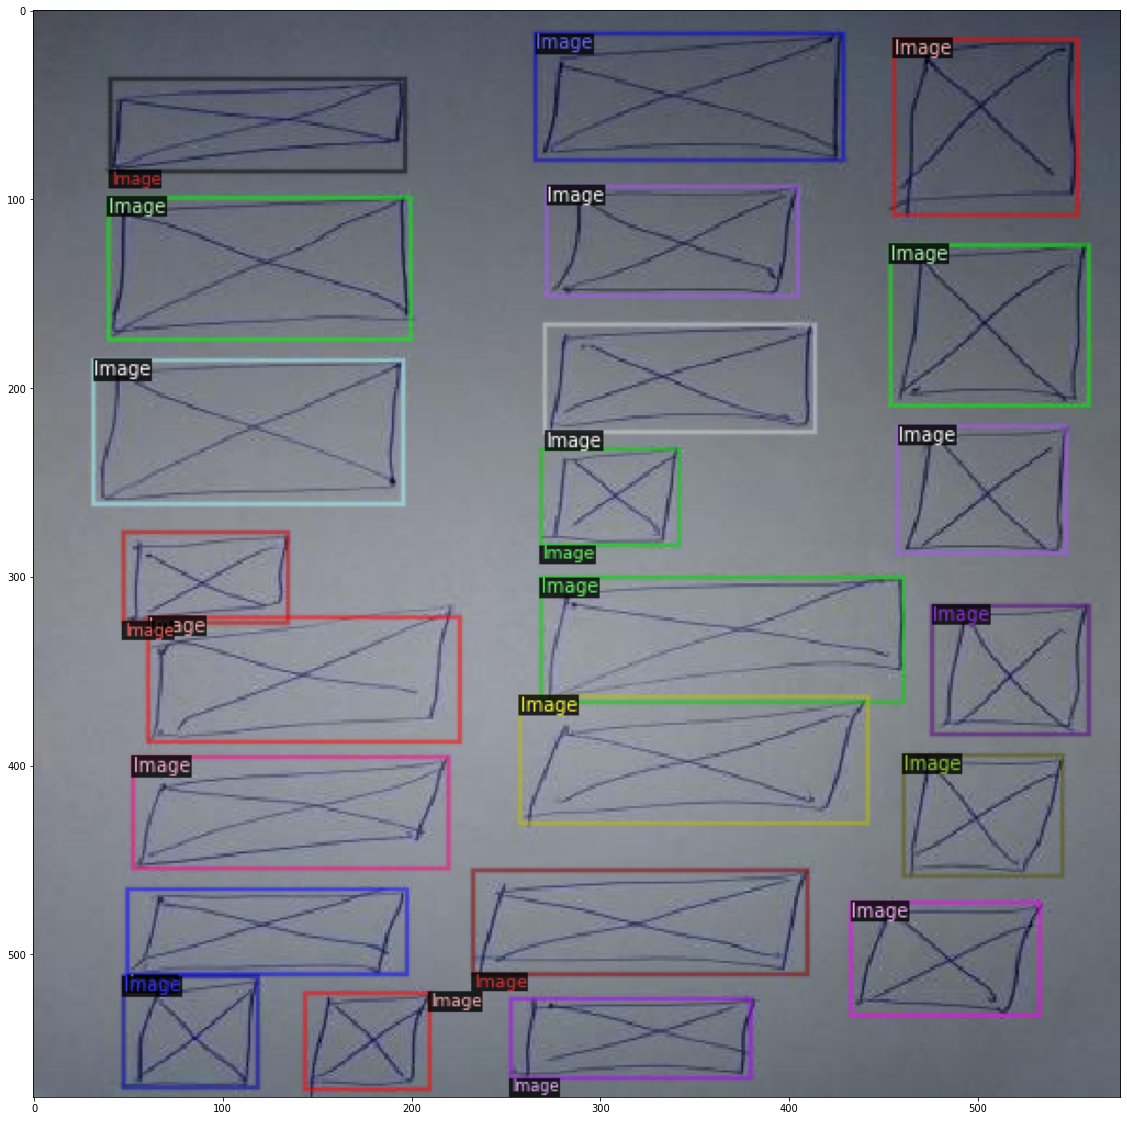

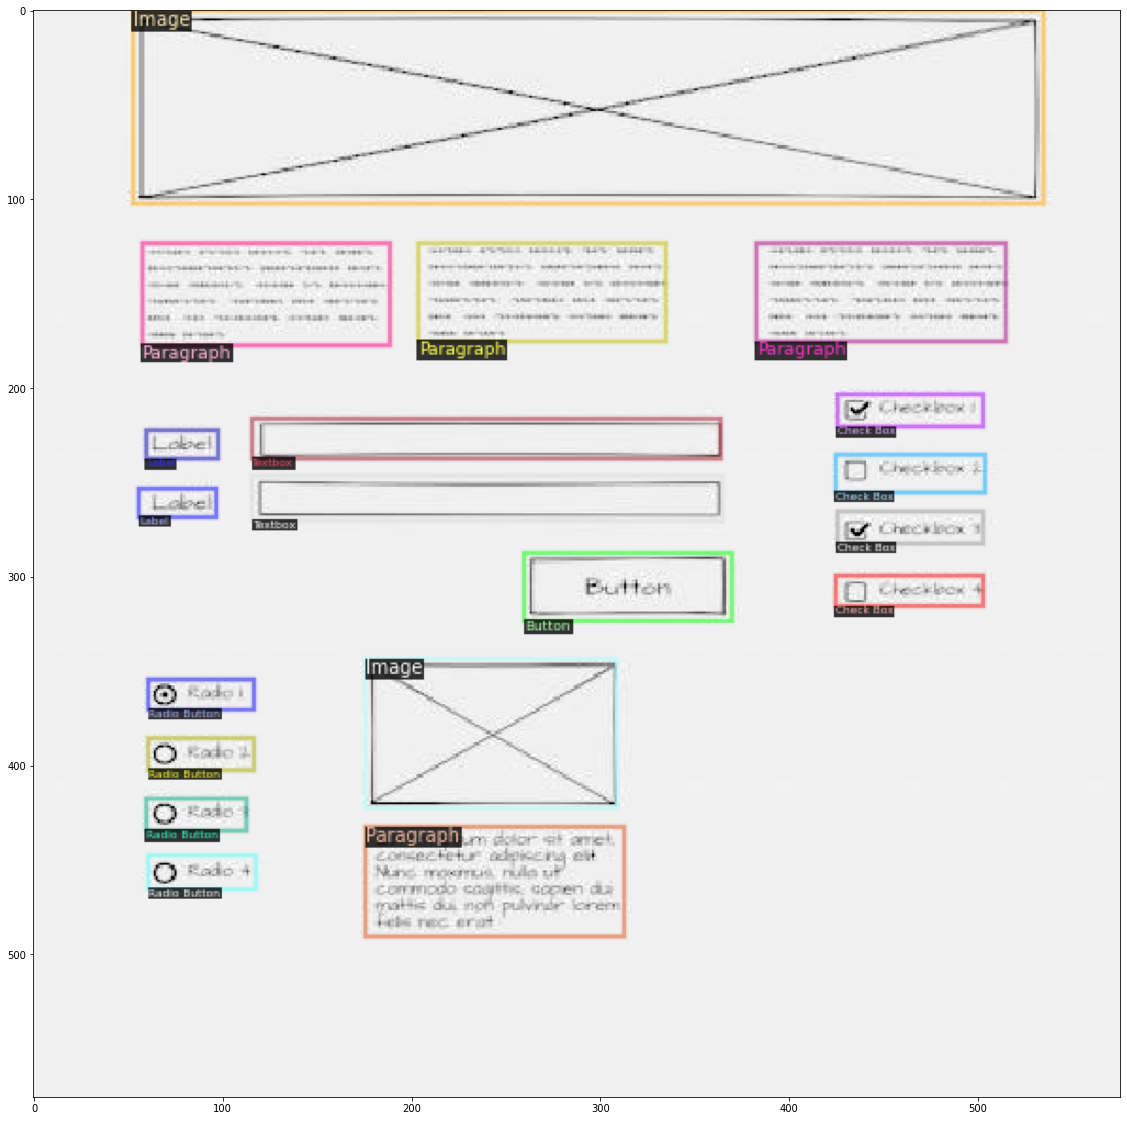

In [11]:
import random
# predictor = DefaultPredictor(cfg)


for d in random.sample(train_dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=1.2)
    vis = visualizer.draw_dataset_dict(d)
    plt.figure(figsize=(20,20))
    plt.imshow(vis.get_image())
    plt.show()

In [12]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("sketches_test", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "sketches_test")

print(inference_on_dataset(predictor.model, val_loader, evaluator))

[09/07 23:25:07 d2.data.datasets.coco]: Loaded 112 images in COCO format from data/test_annotations.coco.json
[09/07 23:25:07 d2.data.build]: Distribution of instances among all 14 categories:
|   category   | #instances   |  category  | #instances   |  category  | #instances   |
|:------------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    Button    | 226          |  Carousel  | 58           | Check Box  | 260          |
|   Heading    | 146          |   Image    | 152          |   Label    | 126          |
|     Link     | 104          | Pagination | 138          | Paragraph  | 130          |
| Radio Button | 106          |   Select   | 80           |   Table    | 70           |
|   Textarea   | 114          |  Textbox   | 190          |            |              |
|    total     | 1900         |            |              |            |              |
[09/07 23:25:07 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShorte